<a href="https://colab.research.google.com/github/Sushiman31/FishTracking/blob/main/FIshDetectionAndTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the requiered Librairies

In [1]:
import glob

In [2]:
import os

In [3]:
HOME=os.getcwd()

In [4]:
print(HOME)

/content


In [5]:
from IPython.display import Image,display

#Download Yolo Model

In [6]:
!git clone https://github.com/Sushiman31/FishTracking.git

Cloning into 'FishTracking'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 150 (delta 1), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (150/150), 36.11 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (38/38), done.


##Setting the Current Directory

In [8]:
%cd /content/FishTracking/YOLOv8-DeepSORT-FishTracking-main

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main


In [9]:
!pip install -e '.[dev]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/FishTracking/YOLOv8-DeepSORT-FishTracking-main
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [10]:
%cd /content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect


 # Importing the Fish dataset

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NTAcuDAenu2ijnWKZW8c")
project = rf.workspace("fishod").project("yolo_binario_train")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=29cb7d2a4c9f561fe39be1c15af048b372f4f26cd2ba7be3c6c80bf150aed9d3
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
  

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to yolo_binario_train-2 in yolov5pytorch:: 100%|██████████| 20000/20000 [00:05<00:00, 3603.86it/s]


##To implement the DeepSORT tracking, downloading the required files 

In [12]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 278MB/s]


In [13]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

# Train the YOLOv8 Model

In [14]:
HOME = '/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect'

In [15]:
%cd {HOME}

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect


In [ ]:
# before the training you need to modify the name of the folder yolo_binario_train-2 in to yolo_binario_train and make the modification in the data.yaml

In [16]:
%cd {HOME}
!python train.py model=yolov8x.pt data=/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect/yolo_binario_train/data.yaml epochs=5 imgsz=640

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect
100% 131M/131M [00:07<00:00, 19.0MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect/yolo_binario_train/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscr

# Plot confusion matrix

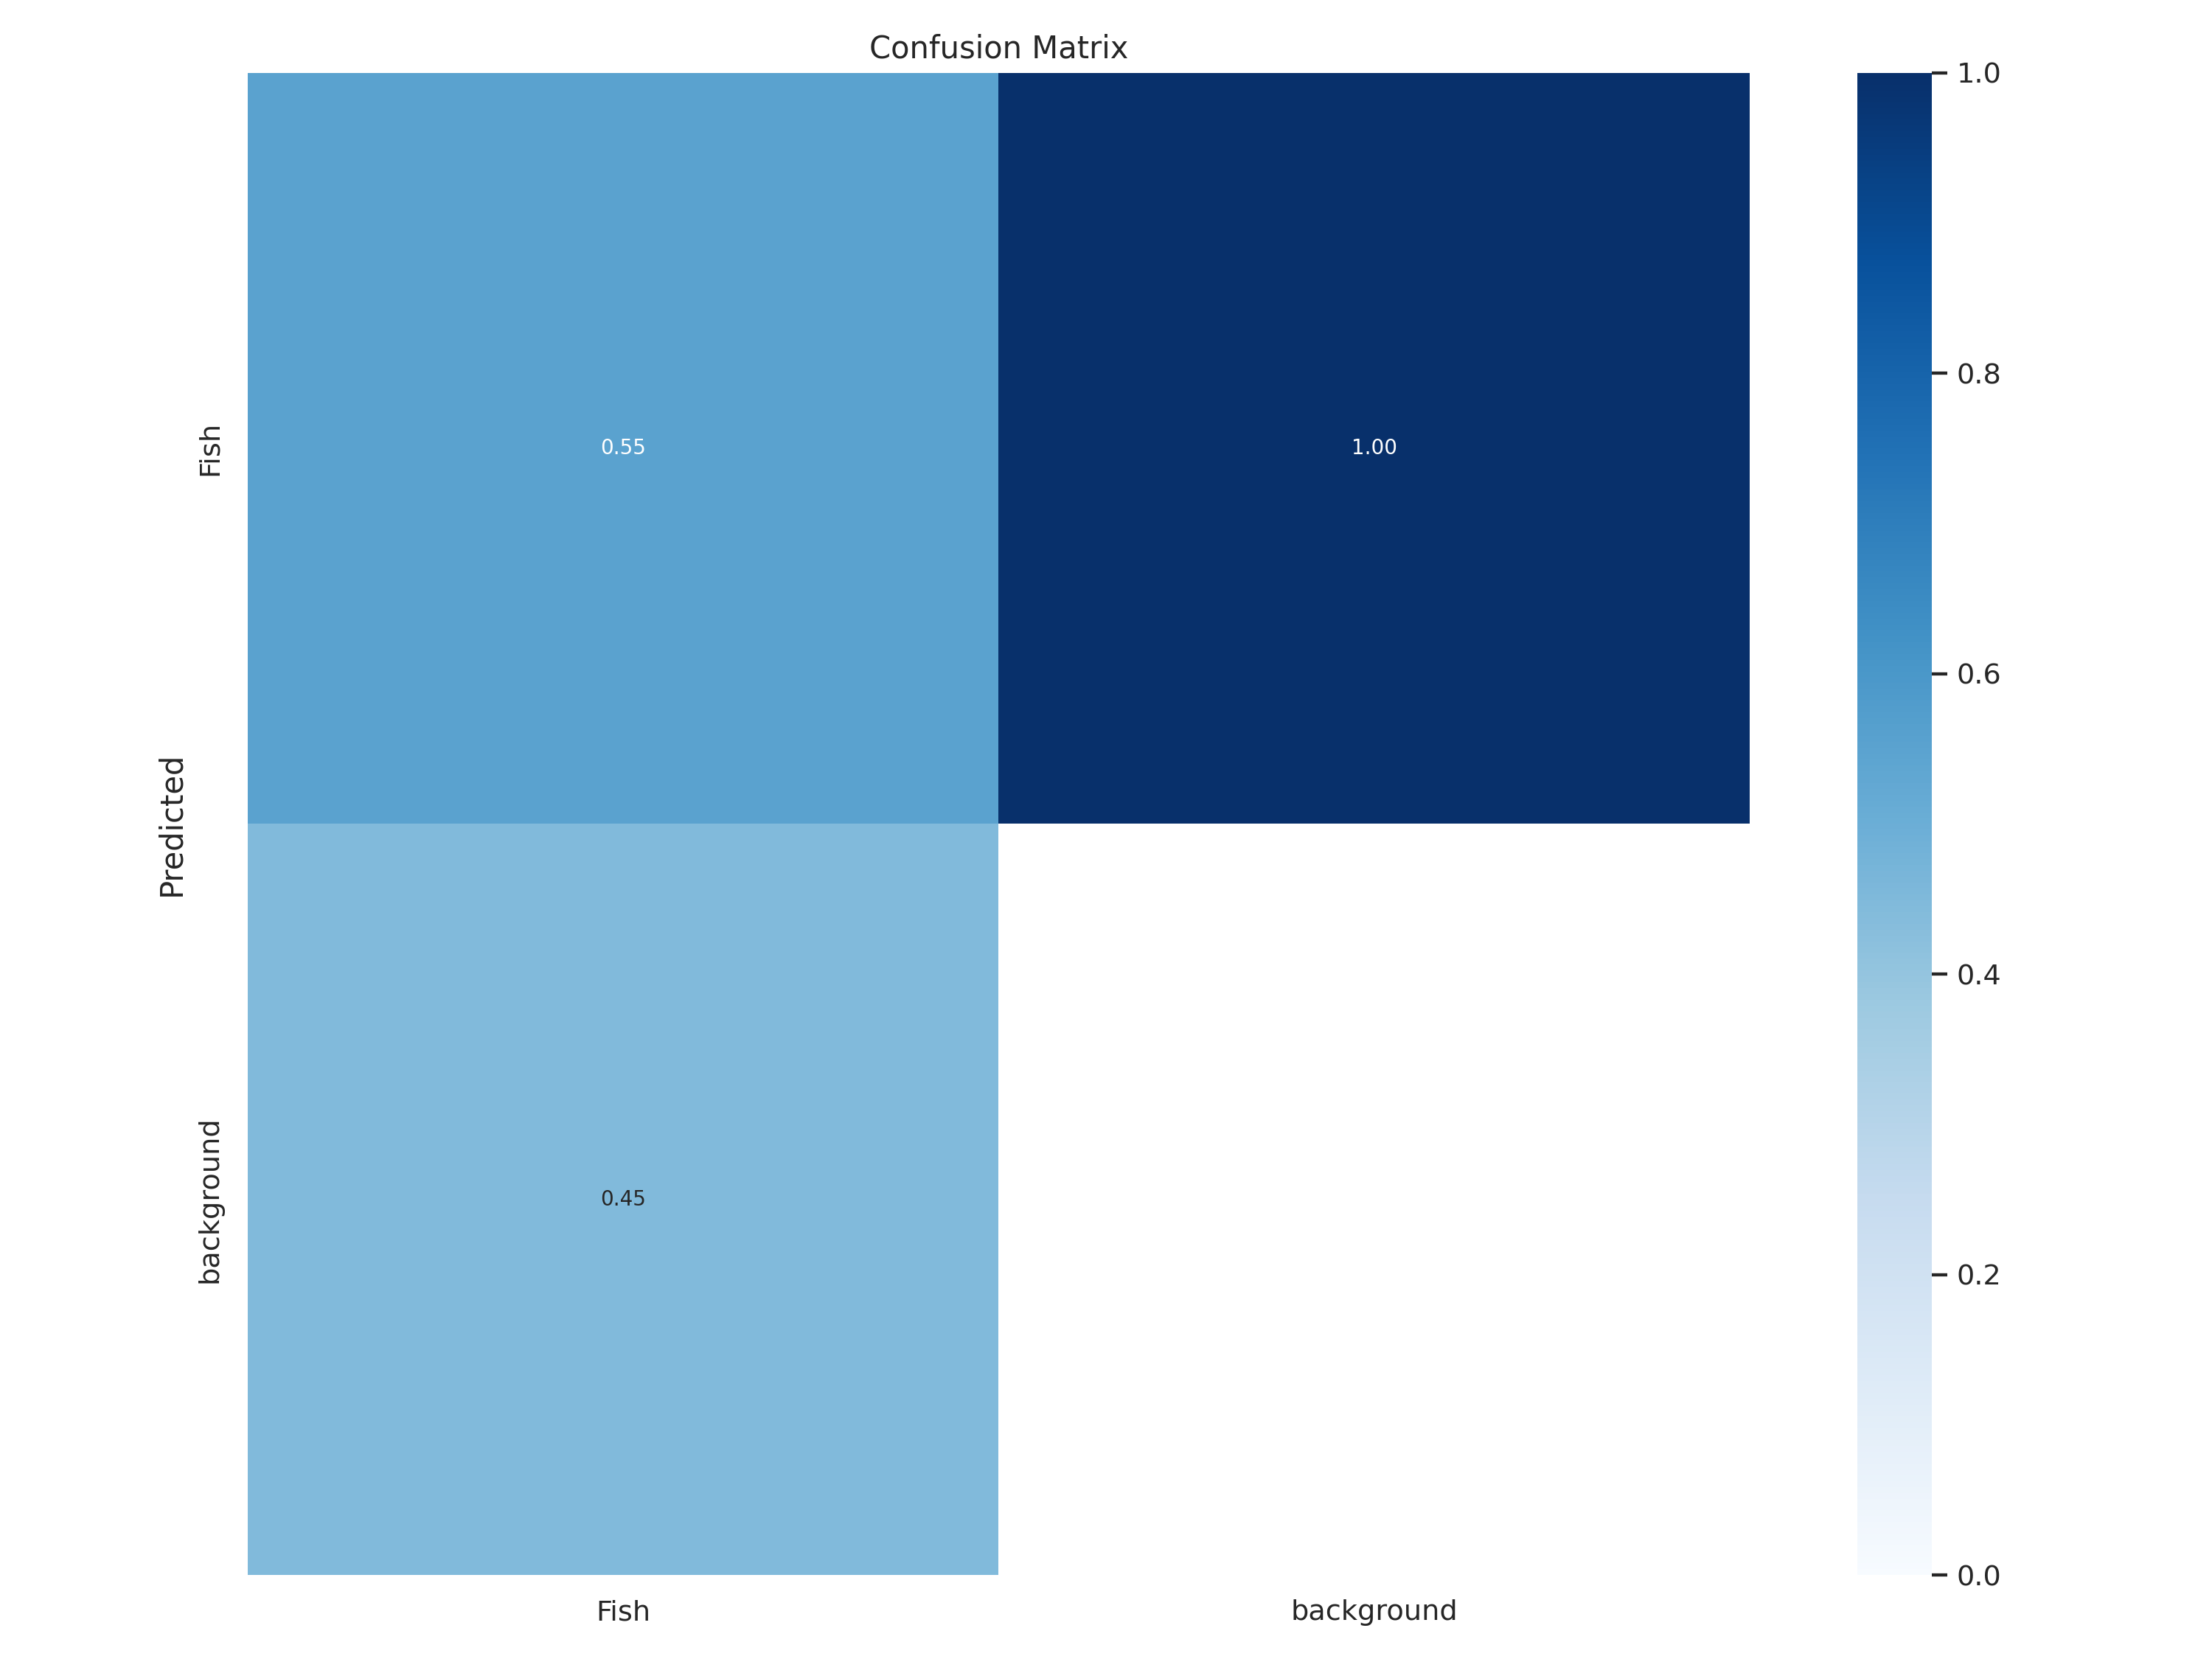

In [18]:
Image(filename = '/content/FishTracking/runs/detect/train/confusion_matrix.png')

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect


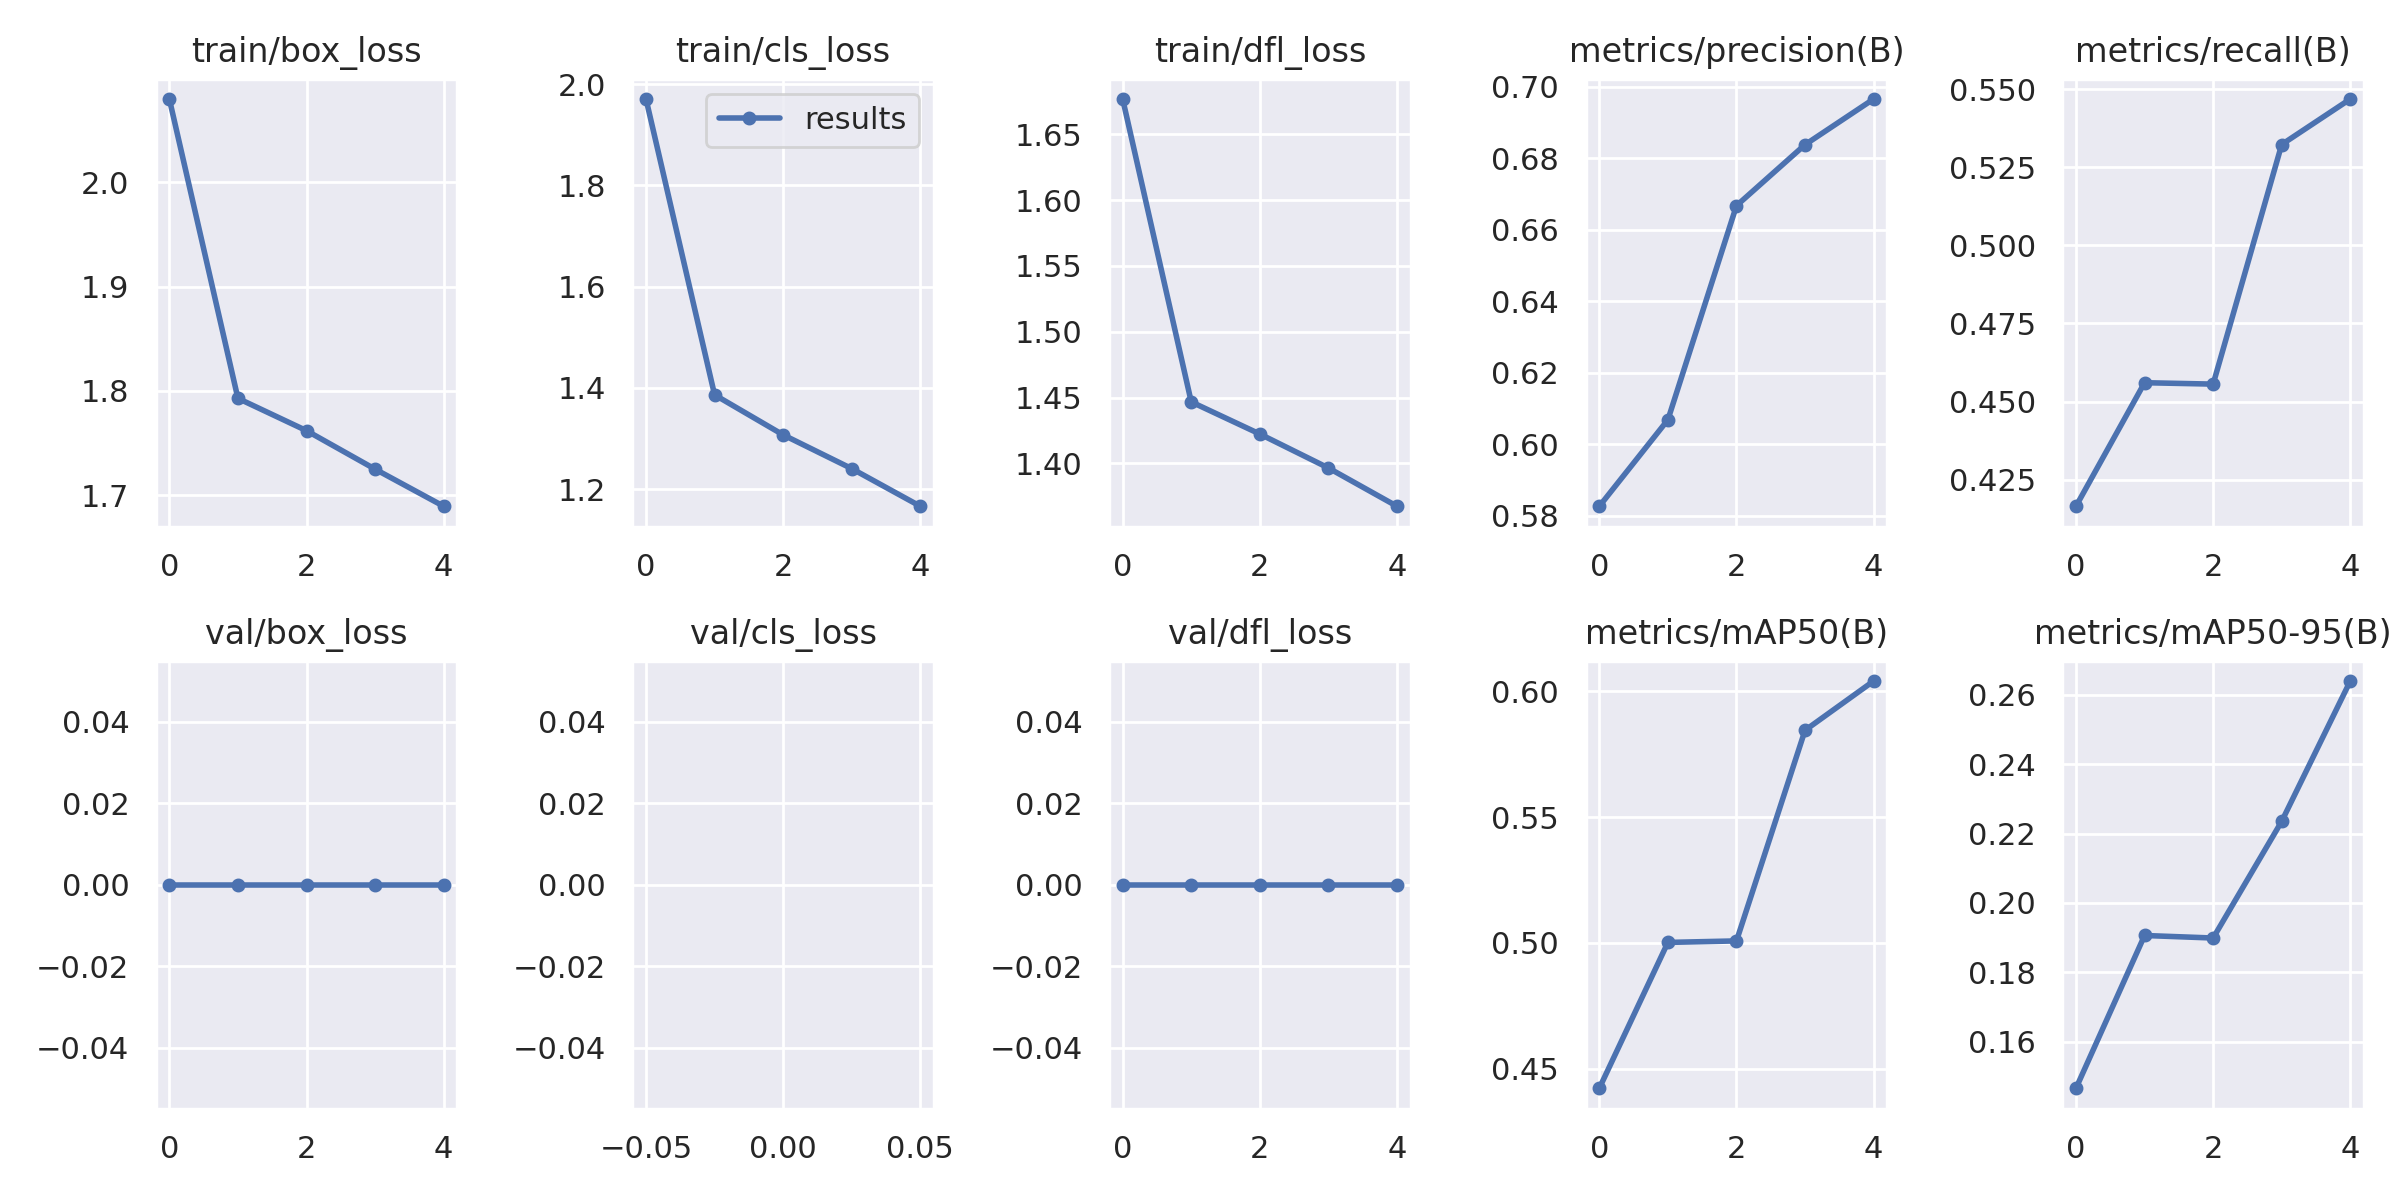

In [19]:
%cd {HOME}

Image(filename=f'/content/FishTracking/runs/detect/train/results.png',width=500)

# download the weight with the google drive link

In [ ]:
# https://drive.google.com/file/d/1CnijEEW51NK0MMDDMii3i7c21tteZX4p/view?usp=sharing

#**Printing the Model Prediction on Validation Batch**

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect


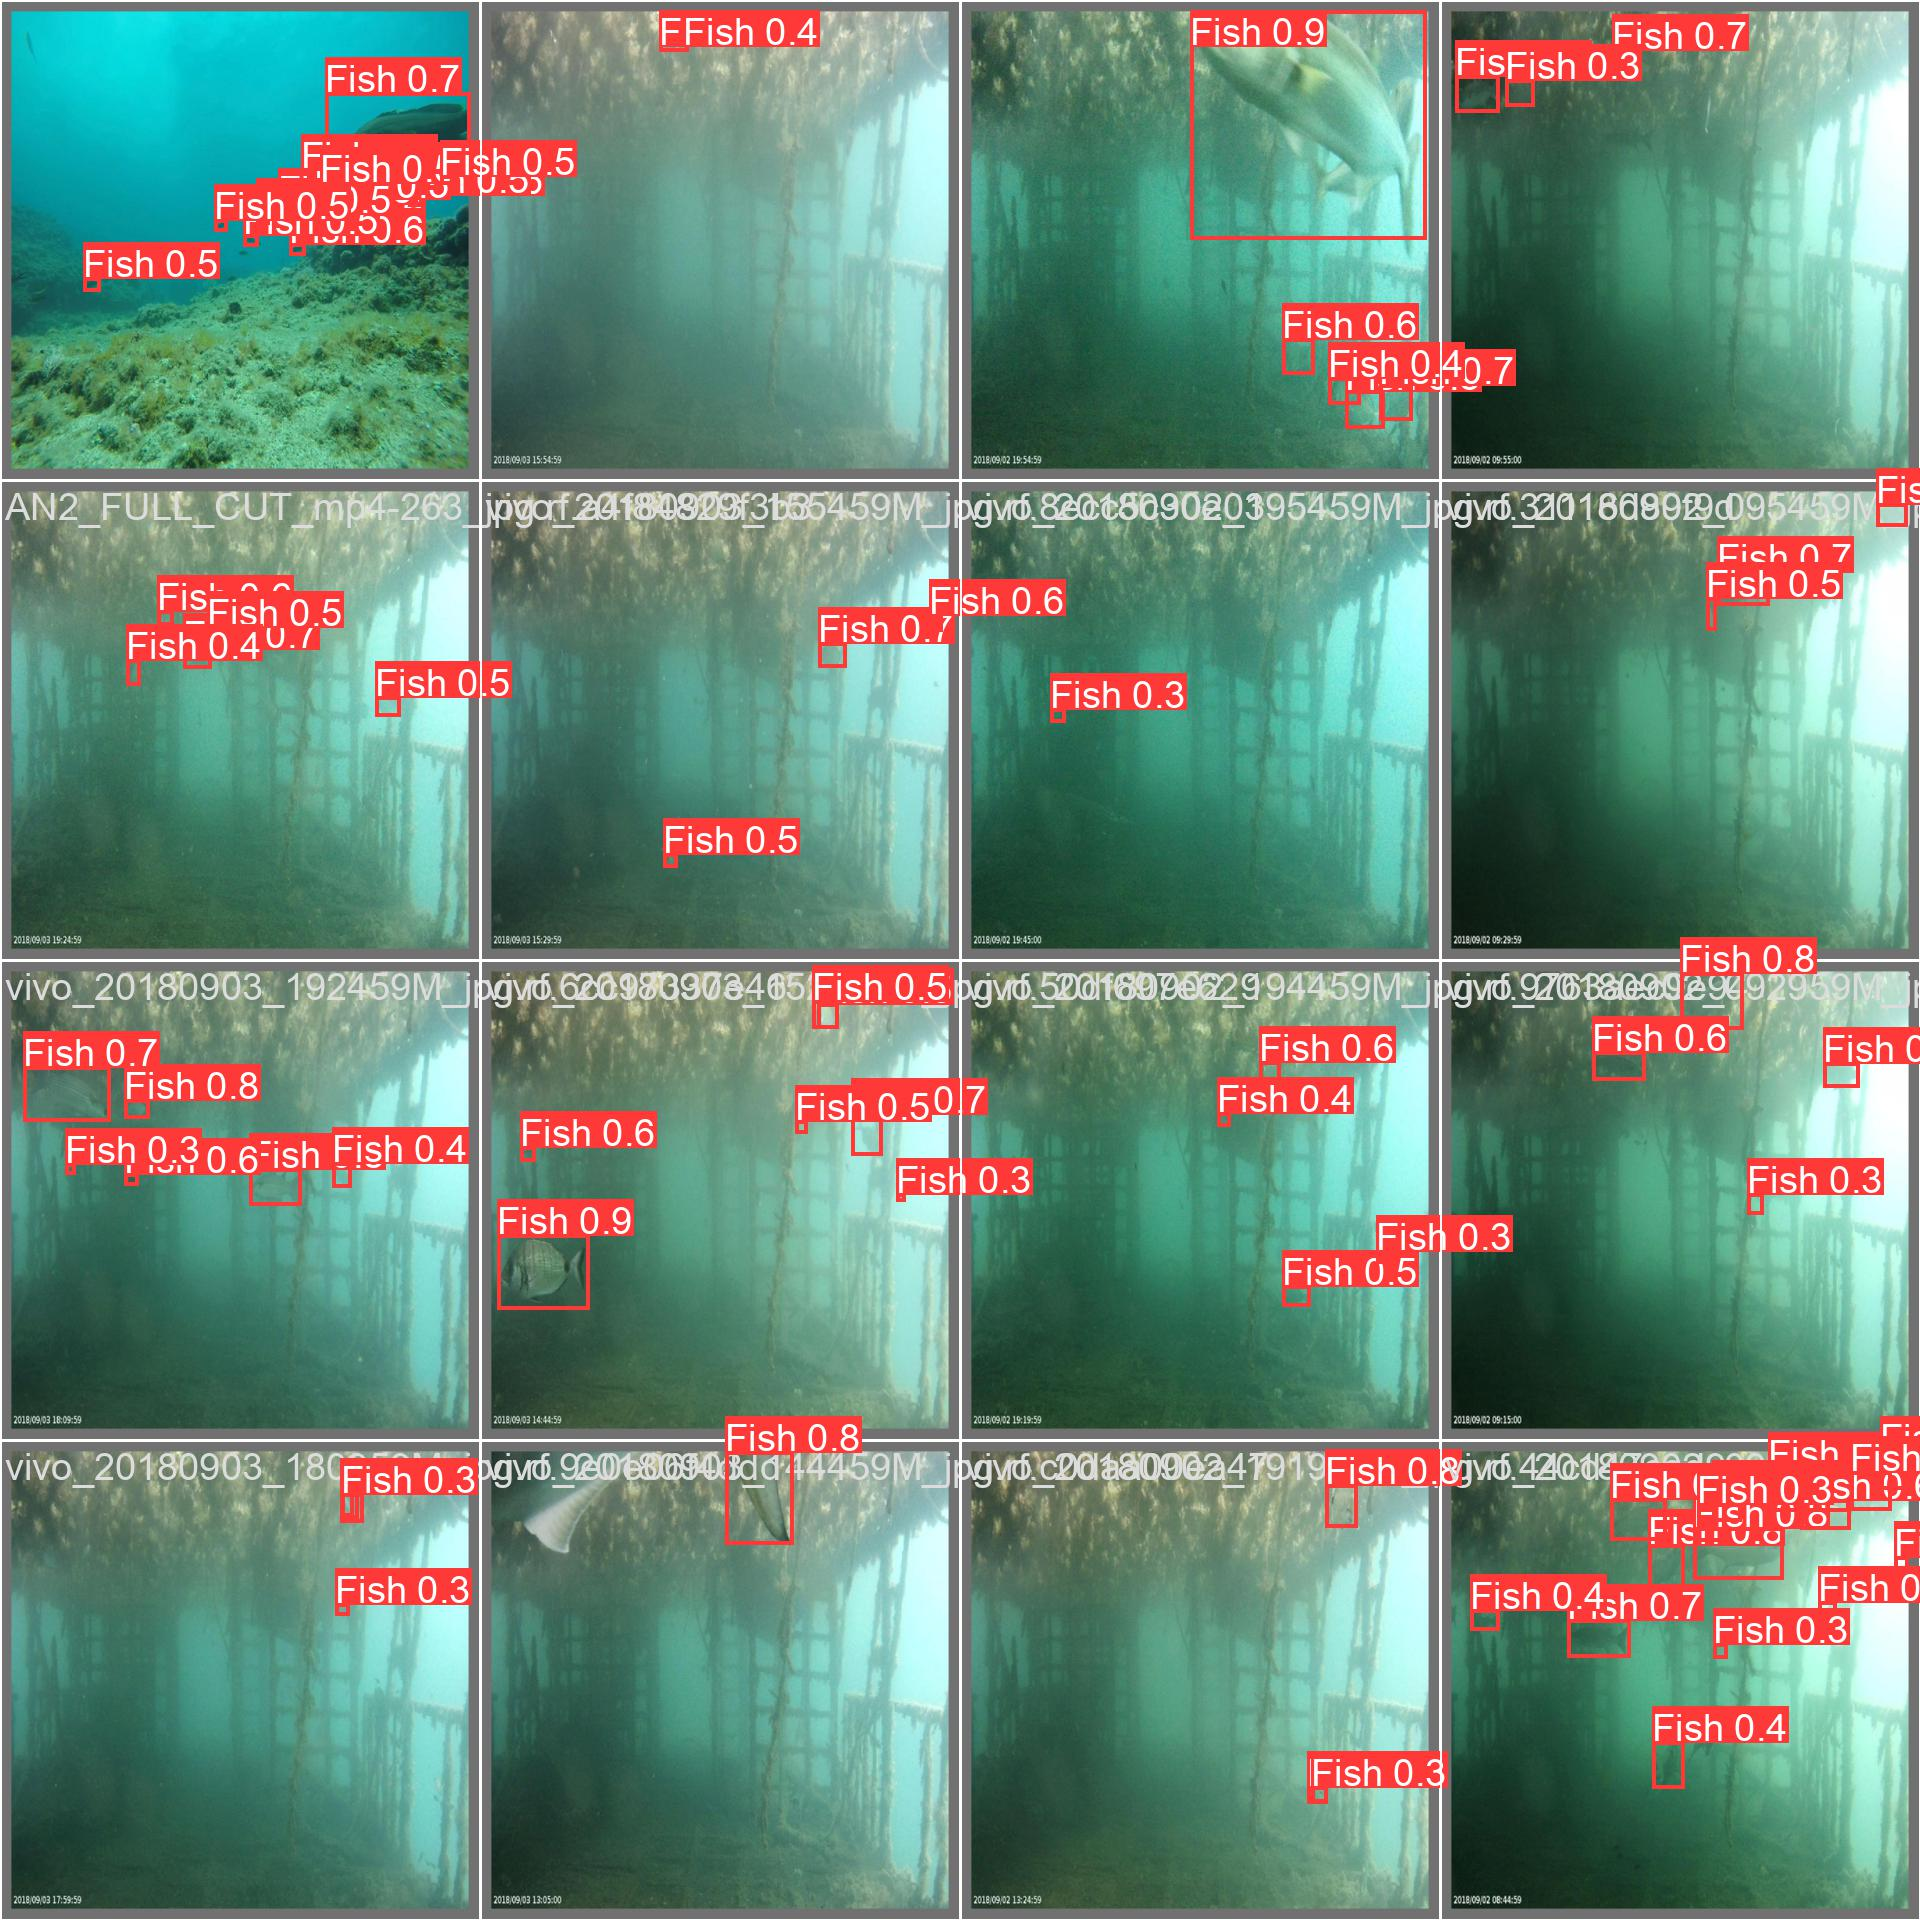

In [20]:
%cd {HOME}
Image(filename=f'/content/FishTracking/runs/detect/train/val_batch0_pred.jpg',width=600)

# Validate Custom Model

In [21]:
! pwd

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect


In [22]:
!python val.py  model=/content/FishTracking/runs/detect/train/weights/best.pt data=/content/datasets/Testing-Self-Annotation/data.yaml

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 33, in <module>
    sys.exit(load_entry_point('ultralytics', 'console_scripts', 'yolo')())
  File "/usr/local/bin/yolo", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "/usr/lib/python3.9/importlib/metadata.py", line 86, in load
    module = import_module(match.group('module'))
  File "/usr/lib/python3.9/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 972, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>"

Testing on demo video

In [28]:
%cd {HOME}
!python predict.py model=/content/FishTracking/runs/detect/train/weights/best.pt conf=0.3 source='/content/test6.mp4'

/content/FishTracking/YOLOv8-DeepSORT-FishTracking-main/ultralytics/yolo/v8/detect
[2023-04-19 20:24:46,491][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
2023-04-19 20:24:47.009342: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 20:24:48.410204: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
video 1/1 (1/500) /content/test6.mp4: 480x640 2 Fishs, 66.4ms
video 1/1 (2/500) /content/test6.mp4: 480x640 5 Fishs, 46.3ms
video 1/1 (3/500) /content/test6.mp4: 480x

display the demo video

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

#Input video path
save_path='/content/runs/detect/predict/test1.mp4'

# Compressed video path
compressed_path="/content/result_compress.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

#Show video
mp4=open(compressed_path,'rb').read()
data_url="data:video/mp4;base64,"+b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.4 source='/content/videos/test2.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

#Input video path
save_path='/content/runs/detect/predict2/test2.mp4'

# Compressed video path
compressed_path="/content/result_compress1.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

#Show video
mp4=open(compressed_path,'rb').read()
data_url="data:video/mp4;base64,"+b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)